Training v22
--
------------------------------------------------------
128x128 - Gray - 75.000 Images

NN - Input > Hidden 56 > Output

10 Epochs

------------------------------------------------------

Import Libraries

In [1]:
import matplotlib.pyplot as plt
import time
from time import gmtime, strftime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from training import dataset as seven_segment_ds

Define constants

In [2]:
NUM_CLASSES = 10
IMAGE_SIZE = 128
COLOR_TYPE = 'gray'
BATCH_SIZE = 75000
EPOCHS = 10
HIDDEN_LAYER = 56

Load data

In [3]:
(X_train, Y_train), (X_test, Y_test) = seven_segment_ds.load_data(
    image_size=IMAGE_SIZE,
    color_type=COLOR_TYPE,
    batch_size=BATCH_SIZE
)

Plot Images

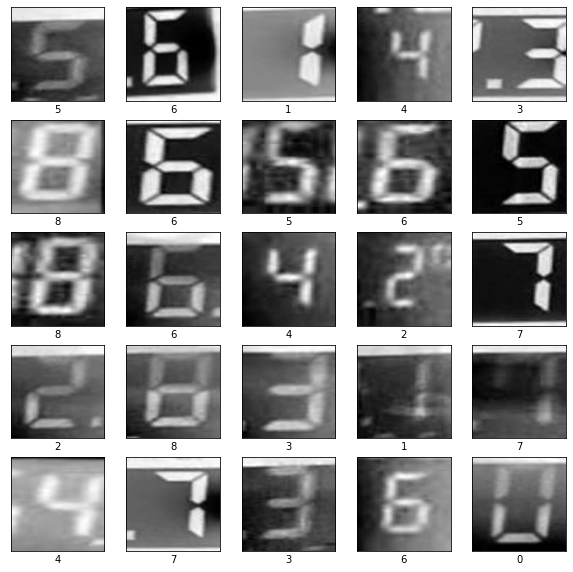

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(Y_train[i])
plt.show()

Prepare data

In [5]:
# Reshape the data - MLPs do not understand such things as '2D'.
feature_vector_length = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, NUM_CLASSES)
Y_test = to_categorical(Y_test, NUM_CLASSES)

Define Model

In [6]:
model = Sequential()
model.add(Dense(HIDDEN_LAYER, input_shape= (feature_vector_length,), activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Train Model

In [7]:
time_start = time.perf_counter()
model.fit(
    X_train,
    Y_train,
    epochs=EPOCHS,
    batch_size=250,
    verbose=1,
    validation_split=0.2
)
time_stop = time.perf_counter()

print('Time for training:', "{:10.3f}".format(time_stop - time_start))

Epoch 1/10
192/192 [==============================] - 7s 34ms/step - loss: 3.0736 - accuracy: 0.2109 - val_loss: 1.5416 - val_accuracy: 0.3650 - ETA: 4s - loss: 6.8768 - accuracy: 0.1258

Test Model

In [8]:
# Test the model after training
time_start = time.perf_counter()
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
time_stop = time.perf_counter()

time_diff = time_stop - time_start
print('Time for testing:', "{:10.3f}".format(time_diff))
print('Time per image:  ', "{:10.3f}".format(time_diff / 15000))

469/469 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8851

Save Model

In [9]:
model_name = strftime("%Y-%m-%d-%H-%M-%S", gmtime()) + '_mlp_X_' + str(HIDDEN_LAYER) + '_10_Y_' \
             + str(IMAGE_SIZE) + 'x' + str(IMAGE_SIZE) + '_' + str(COLOR_TYPE) + '_' + str(BATCH_SIZE) \
             + '_loss_' + "{:2.4f}".format(test_results[0]) + '_acc_' + "{:2.4f}".format(test_results[1])
model.save_weights('./checkpoints/' + model_name)
model.save('./models/' + model_name + '.h5')

print("Model saved as " + model_name)

Model saved as 2021-03-01-23-11-04_mlp_X_56_10_Y_128x128_gray_75000_loss_0.4216_acc_0.8851


Models Saved at:

2021-03-01-22-56-00_mlp_X_56_10_Y_32x32_gray_75000_loss_0.0903_acc_0.9826